In [1]:
# Import required packages
import earthpy 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import hvplot.pandas

In [2]:
aspen_station = ('https://www.ncei.noaa.gov/access/services/da'
'ta/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00050372&startDate=1980-07-01&endDate=2025-07-31&units=standard')
aspen_station

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00050372&startDate=1980-07-01&endDate=2025-07-31&units=standard'

In [3]:
# Download the climate data
aspen_climate_df = pd.read_csv(
    aspen_station,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
aspen_climate_df.head()

,STATION,TOBS
DATE,,
1980-07-01,USC00050372,62.0
1980-07-02,USC00050372,55.0
1980-07-03,USC00050372,58.0
1980-07-04,USC00050372,60.0
1980-07-05,USC00050372,50.0


In [4]:
# Save the climate data
aspen_climate_df.to_csv('moran_temp_data.csv')

In [5]:
# Check that data was imported into a pandas DataFrame
type(aspen_climate_df)

pandas.core.frame.DataFrame

In [6]:
# Remove station column in dataframe
aspen_climate_df = aspen_climate_df[["TOBS"]]
aspen_climate_df

,TOBS
DATE,
1980-07-01,62.0
1980-07-02,55.0
1980-07-03,58.0
1980-07-04,60.0
1980-07-05,50.0
...,...
2025-07-27,61.0
2025-07-28,54.0
2025-07-29,62.0


In [7]:
aspen_units_f = aspen_climate_df.rename(columns={
    'TOBS': 'temp_f',
})
aspen_units_f

,temp_f
DATE,
1980-07-01,62.0
1980-07-02,55.0
1980-07-03,58.0
1980-07-04,60.0
1980-07-05,50.0
...,...
2025-07-27,61.0
2025-07-28,54.0
2025-07-29,62.0


In [8]:
#Adding a column of temp converted to C
aspen_units_c_f = aspen_units_f
aspen_units_c_f['temp_c'] = ((aspen_units_f['temp_f']-32)*5/9)

#Create a new dataframe with just temp C
aspen_units_c = aspen_units_c_f[["temp_c"]]
aspen_units_c

,temp_c
DATE,
1980-07-01,16.666667
1980-07-02,12.777778
1980-07-03,14.444444
1980-07-04,15.555556
1980-07-05,10.000000
...,...
2025-07-27,16.111111
2025-07-28,12.222222
2025-07-29,16.666667


<Axes: xlabel='DATE'>

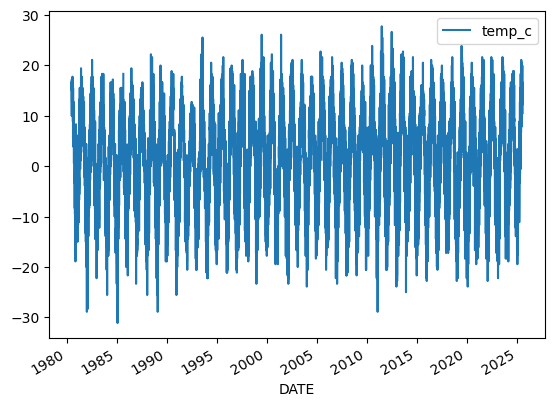

In [9]:
aspen_units_c.plot()

<Axes: title={'center': 'Aspen Daily Temperature Data From 1900 to 2023'}, xlabel='Date', ylabel='Temperature (C)'>

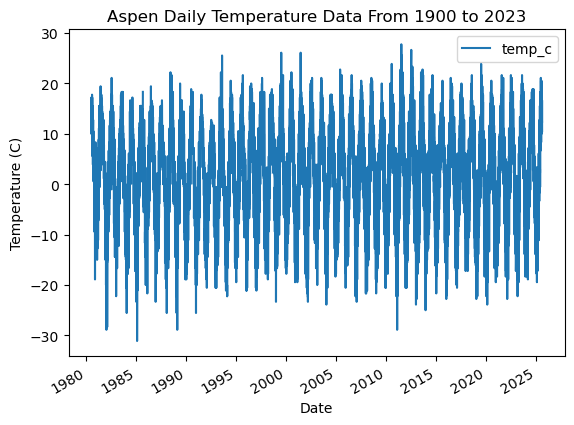

In [10]:
# Plot the data using .plot
aspen_units_c.plot(
    y='temp_c',
    title='Aspen Daily Temperature Data From 1900 to 2023',
    xlabel='Date',
    ylabel='Temperature (C)')

In [11]:
# 'YS' stands for 'Year Begin' in pandas
# Below we are resampling to once a year (YS), and recording the mean temperature of each year
# We are saving the new resampled data in the dataframe called ann_climate_df
# This new dataframe should have just one temp value per year
aspen_ann_climate_df = (
    aspen_units_c
    .resample('YS') 
    .mean()
)
aspen_ann_climate_df

,temp_c
DATE,
1980-01-01,4.320652
1981-01-01,2.940639
1982-01-01,1.251526
1983-01-01,1.719282
1984-01-01,0.445665
1985-01-01,0.890751
1986-01-01,2.712517
1987-01-01,0.900488
1988-01-01,0.831815


<Axes: title={'center': 'Annual Average Temperature in Aspen From 1901 to 2023'}, xlabel='Year', ylabel='Temperature (°C)'>

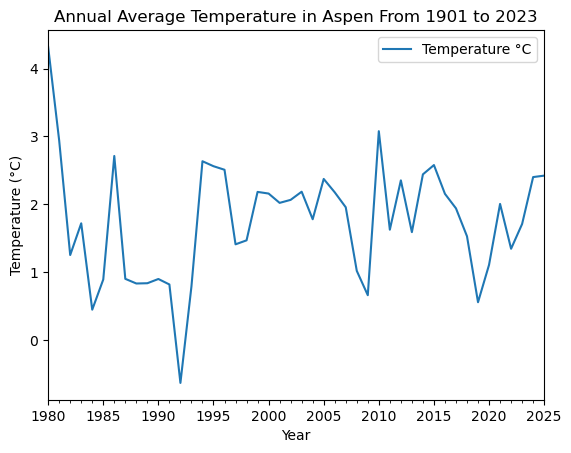

In [12]:
# Plot the annual data
aspen_ann_climate_df.plot(
    y='temp_c',
    title='Annual Average Temperature in Aspen From 1901 to 2023',
    xlabel='Year',
    ylabel='Temperature (°C)',
    label='Temperature °C'
)

In [13]:
interactive_plot = aspen_ann_climate_df.hvplot(
    y="temp_c",
    title="Annual Average Temperature in Aspen From 1901 to 2023",
    xlabel="Year",
    ylabel="Temperature (°C)",
    label="Temperature (°C)"
)
interactive_plot

:Curve   [DATE]   (temp_c)

In [14]:
# General coding structure below outlined by ChatGPT. 
# I went through and added extra edits and comments to make sure I understand everything
# Need to reset the index to make sure that the 'DATE' column is recognized
aspen_ann_climate_df = aspen_ann_climate_df.reset_index()

# Convert 'DATE' column values to pandas datetime objects
# It is easier to extract just the year if the values are in this format
aspen_ann_climate_df["DATE"] = pd.to_datetime(aspen_ann_climate_df["DATE"])

# The line below is extracting just the year (we don't want months or days)
aspen_ann_climate_df["Year"] = aspen_ann_climate_df["DATE"].dt.year

# Remove Nan values. The Linear regression will run into errors if we keep the Nan values
aspen_ann_climate_df_clean = aspen_ann_climate_df.dropna(subset=["temp_c"])

# Assigning the X and y values for the linear regression feature from sklearn
# This creates numpy arrays of the year and temp columns
X = aspen_ann_climate_df_clean[["Year"]].values
y = aspen_ann_climate_df_clean["temp_c"].values

# Method for running the linear regression using sklearn
model = LinearRegression()
model.fit(X, y)

# finding the slope with .coef_
slope = model.coef_[0]

# finding the intercept with .intercept
intercept = model.intercept_

print("Slope:", round(slope, 4), "°C per year")
print("Intercept:", round(intercept, 4))

Slope: 0.0061 °C per year
Intercept: -10.5503


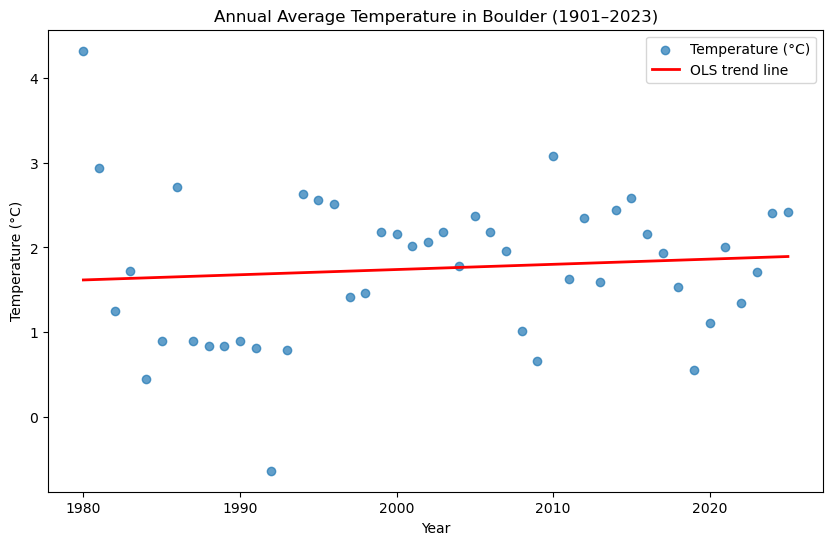

In [15]:
# Create a new figure object using matplotlib and define its size
plt.figure(figsize=(10, 6))

# Plot the temperature data
plt.scatter(
    aspen_ann_climate_df["Year"],
    aspen_ann_climate_df["temp_c"],
    label="Temperature (°C)",
    alpha=0.7
)

# The line below finds the min and max of "year"
# This way, our trendline won't extend off the graph of the temp data
x_vals = np.linspace(
    aspen_ann_climate_df["Year"].min(),
    aspen_ann_climate_df["Year"].max()
)

# Applying the y=mx+b formula for lines
y_trend = slope * x_vals + intercept

# plotting the line
plt.plot(
    x_vals,
    y_trend,
    color="red",
    linewidth=2,
    label="OLS trend line"
)

# Labels and title
plt.title("Annual Average Temperature in Boulder (1901–2023)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()

plt.show()


In [16]:
# Making interactive plot using help from ChatGPT
import pandas as pd
import numpy as np
import hvplot.pandas
from sklearn.linear_model import LinearRegression
import holoviews as hv
from bokeh.models import NumeralTickFormatter

# Ensure Bokeh is the backend for hvplot
hv.extension("bokeh")

# --- Clean up the DataFrame ---
# Drop missing values pre-1901
aspen_ann_climate_df_clean = aspen_ann_climate_df.dropna(subset=["temp_c"])
aspen_ann_climate_df_clean = aspen_ann_climate_df_clean[aspen_ann_climate_df_clean["Year"] >= 1901]

# --- Fit linear regression ---
X = aspen_ann_climate_df_clean[["Year"]].values
y = aspen_ann_climate_df_clean["temp_c"].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("Slope:", round(slope, 4), "°C/year")
print("Intercept:", round(intercept, 4))

# --- Plot observed data (interactive scatter) ---
interactive_plot = aspen_ann_climate_df_clean.hvplot.scatter(
    x="Year",
    y="temp_c",
    alpha=0.7,
    label="Temperature (°C)",
    xlabel="Year",
    ylabel="Temperature (°C)",
    title="Annual Average Temperature in Boulder (1980–2025)",
    size=6,
    color="blue",
    nan_policy="raise"
)

# --- Generate trendline points ---
x_vals = np.linspace(
    aspen_ann_climate_df_clean["Year"].min(),
    aspen_ann_climate_df_clean["Year"].max(),
    100
)
y_trend = slope * x_vals + intercept

# Convert trendline into a DataFrame so hvplot can plot it
trend_df = pd.DataFrame({
    "Year": x_vals.astype(int),  # ensure integer years
    "OLS trend line": y_trend
})

trend_plot = trend_df.hvplot.line(
    x="Year",
    y="OLS trend line",
    color="red",
    line_width=2,
    label="OLS trend line"
)

# --- Helper function to center title and fix year formatting ---
def format_plot(plot, element):
    plot.state.title.align = "center"
    plot.state.xaxis.formatter = NumeralTickFormatter(format="0")  # force integer year labels

# --- Combine plots and apply formatting ---
final_plot = (interactive_plot * trend_plot).opts(
    title="Annual Average Temperature in Aspen (1980–2025)",
    hooks=[format_plot],
    framewise=True,
    padding=0.05,
    legend_position="top_right"
)

import hvplot
hvplot.save(final_plot, "aspen_temp_interactive.html")

final_plot

Slope: 0.0061 °C/year
Intercept: -10.5503


:Overlay
   .Scatter.Temperature_left_parenthesis_degree_C_right_parenthesis :Scatter   [Year]   (temp_c)
   .Curve.OLS_trend_line                                            :Curve   [Year]   (OLS trend line)